<a href="https://colab.research.google.com/github/Koftarik/ML_service/blob/main/Airline_clients_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Клиенты авиакомпании

Датасет содержит информацию о клиентах некоторой авиакомпании

## Импорт библиотек, константы

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42

In [3]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/stepik_from_idea_to_mvp/main/datasets/clients.csv"

## Загрузка и обзор данных

### Загрузка

In [4]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
- `satisfaction`: удовлетворенность клиента полетом, бинарная (*satisfied* или *neutral or dissatisfied*)

**Признаки**
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

In [5]:
# информация от столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

In [6]:
# случайные три записи из датасета
df.sample(3)

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
51875,51876,Male,41.0,Loyal Customer,Personal Travel,Eco,771.0,0.0,7.0,4.0,...,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,neutral or dissatisfied
105147,105148,Female,32.0,Loyal Customer,Business travel,Business,281.0,8.0,3.0,2.0,...,2.0,2.0,2.0,3.0,4.0,3.0,3.0,3.0,2.0,neutral or dissatisfied
76289,76290,Female,22.0,Loyal Customer,Business travel,Business,2677.0,21.0,0.0,1.0,...,1.0,1.0,1.0,4.0,3.0,2.0,4.0,2.0,1.0,neutral or dissatisfied


In [7]:
df.head(10)

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied
5,6,Male,43.0,Loyal Customer,Business travel,Business,3788.0,0.0,0.0,4.0,...,5.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,satisfied
6,7,Male,43.0,Loyal Customer,Business travel,Business,1963.0,0.0,0.0,3.0,...,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,satisfied
7,8,Female,60.0,Loyal Customer,Business travel,Business,853.0,0.0,3.0,4.0,...,4.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,satisfied
8,9,Male,50.0,Loyal Customer,Business travel,Business,2607.0,0.0,0.0,4.0,...,2.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,neutral or dissatisfied
9,10,Female,38.0,Loyal Customer,Business travel,Business,2822.0,13.0,0.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied


In [8]:
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129564.000000,129786.000000,129773.000000,129371.000000,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,64940.500000,40.113951,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,37493.270818,20.365190,4516.191530,93.206139,109.167328,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,64940.500000,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,129880.000000,621.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


In [9]:
df.describe(include=object)

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129549,129803,129779,129764,129880
unique,2,2,2,3,3
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65726,106040,89625,62103,58879


In [11]:
df.describe(include='all')

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,129880.000000,129549,129564.000000,129803,129779,129764,129786.000000,129773.000000,129371.000000,129835.000000,...,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000,129880
unique,NaN,2,NaN,2,2,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Female,NaN,Loyal Customer,Business travel,Business,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,65726,NaN,106040,89625,62103,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,64940.500000,NaN,40.113951,NaN,NaN,NaN,1323.385804,15.811301,16.651406,2.732183,...,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865,NaN
std,37493.270818,NaN,20.365190,NaN,NaN,NaN,4516.191530,93.206139,109.167328,1.359786,...,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625,NaN
min,1.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,NaN
25%,32470.750000,NaN,27.000000,NaN,NaN,NaN,414.000000,0.000000,0.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000,NaN
50%,64940.500000,NaN,40.000000,NaN,NaN,NaN,846.000000,0.000000,0.000000,3.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000,NaN
75%,97410.250000,NaN,51.000000,NaN,NaN,NaN,1744.000000,12.000000,13.000000,4.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000,NaN


# Оценка качества данных

Для начала оценим качество числовых данных, в которых могут быть очевидные выбросы. Это Age, Flight Distance, Departure Delay in Minutes и Arrival Delay in Minutes.

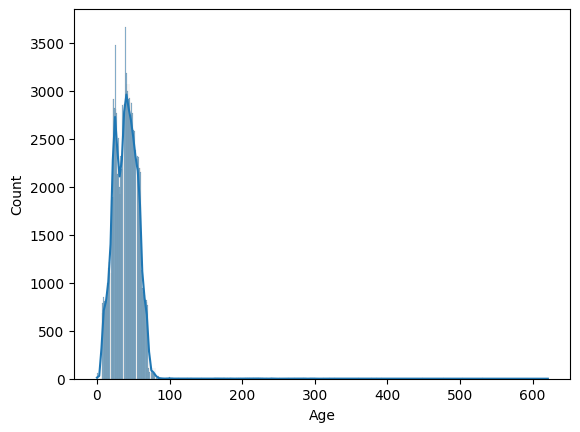

In [12]:
sns.histplot(df['Age'], kde=True)
plt.show()

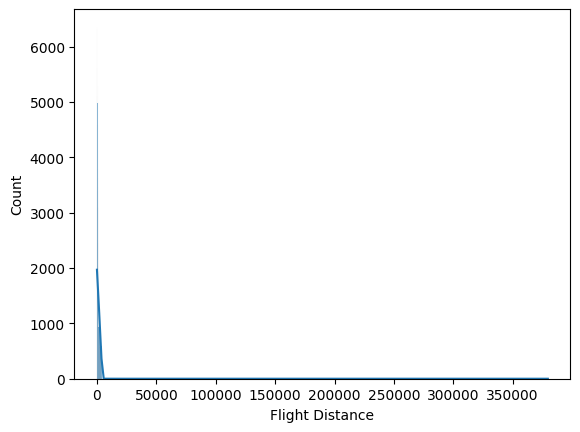

In [18]:
sns.histplot(df['Flight Distance'], kde=True)
plt.show()

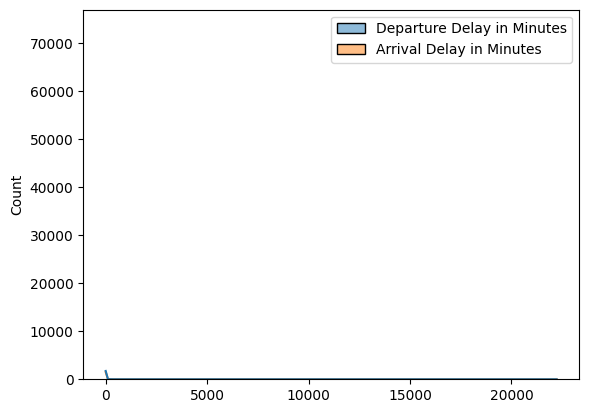

In [21]:
sns.histplot(df[['Departure Delay in Minutes','Arrival Delay in Minutes']], kde=True)
plt.show()

Text(0.5, 1.0, 'Задержка прилета')

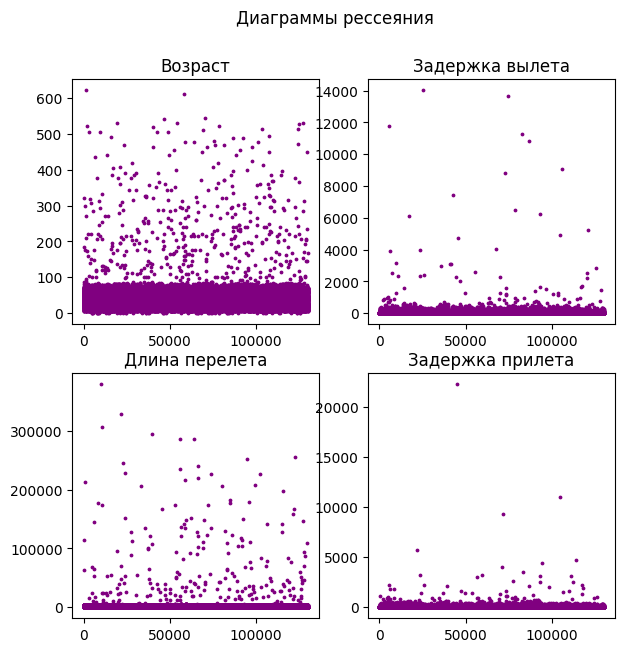

In [22]:
fig, axs = plt.subplots(nrows= 2 , ncols= 2, figsize = [7,7],)

#add title
fig. suptitle('Диаграммы рессеяния')

axs[0,0].scatter(df['id'], df['Age'], s=3, color = 'purple')
axs[0,0].set_title('Возраст')

axs[1,0].scatter(df['id'], df['Flight Distance'], s=3, color = 'purple')
axs[1,0].set_title('Длина перелета')

axs[0,1].scatter(df['id'], df['Arrival Delay in Minutes'], s=3, color = 'purple')
axs[0,1].set_title('Задержка вылета')

axs[1,1].scatter(df['id'], df['Departure Delay in Minutes'], s=3, color = 'purple')
axs[1,1].set_title('Задержка прилета')


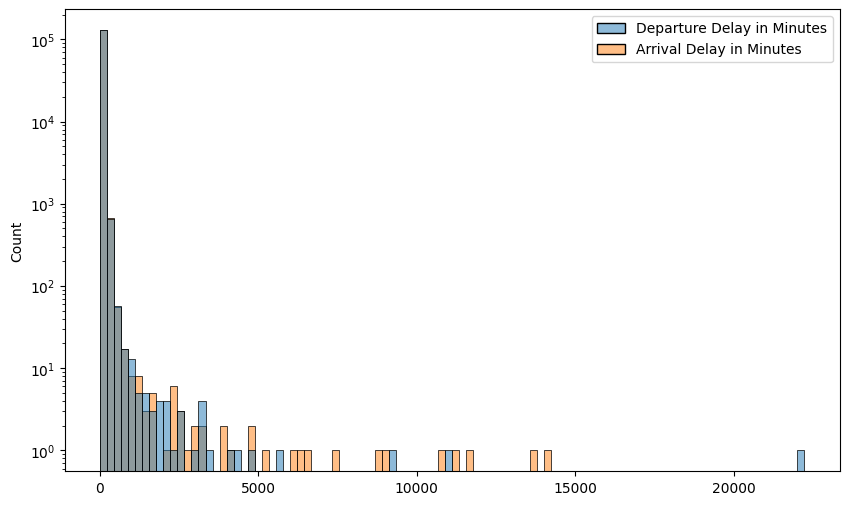

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']], bins=100)
plt.yscale('log')
plt.show()

Очевидно, что возраст в 621 год (осада Смирны Тамерланом), полет в 370 000 км (Луна) и задержки в 23000 минут (16 дней) и более не являются адекватными значениями.